# Import libraries

The `brisk` library is a custom-made Python library for the import, analysis and visualization of data from the BRISK project.
It comprises scripts and modules for managing data. All the main functions will be compiled in a script in order to be able to use all the functions outside the Python environment

A guide for the installation and the setup of the database, together with the list of scripts will be provided when the whole analysis is set up.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings

import brisk.visualization.plots_imu as imu
from brisk.utils import path
from brisk.analysis import segmentation

warnings.filterwarnings('ignore')

# List all the subjects

In the `brisk` library, a series of functions for the description of the database (number of subjects, number of trials) is provided.

In [30]:
subjects = path.get_subjects()
print(subjects)

subject = 'alessandro'
update_subject = True
trials = path.get_trials(subject)
print(trials)

['alessandro', 'carucci', 'gaetano', 'giovanni', 'lorenzo', 'luca', 'micheal', 'mizio', 'simone']
['full', 'full_robot', 'half_robot', 'half_robot_touch']


# Visualize IMU data for one subject

Functions are provided also for the visualization of raw data (after a 5Hz LP filter)

<span style="color: red; font-weight: bold">Note</span> AP, ML and VT directions are defined during the neutral pose (arms parallel to the ground)

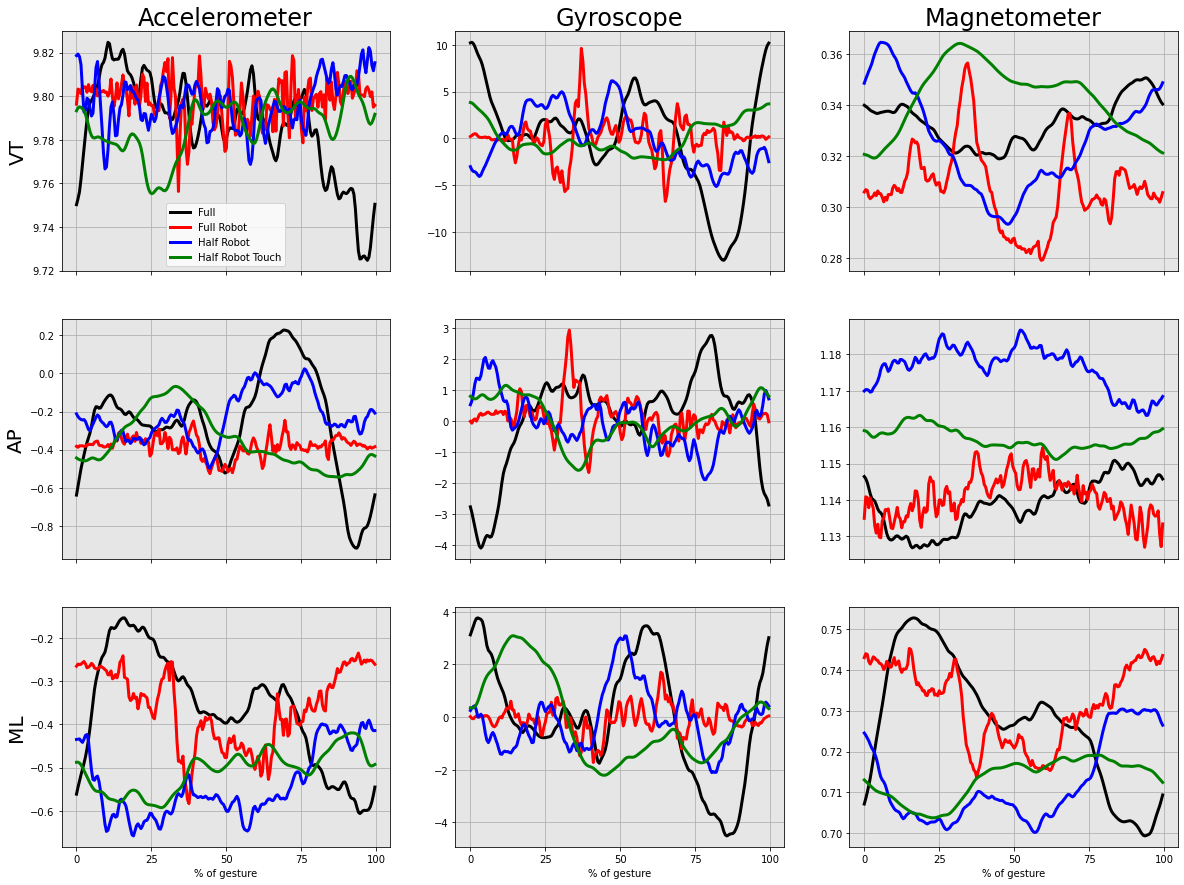

In [31]:
segment = 'trunk'
imu.plot_all_trials(subject, 'trunk')

# Get gesture frequency

All the quantitative analyses on the data will be hard-coded in the library, to ensure repeatability. Here, an example of the analysis of the speed of gestures, in terms of packages per minute

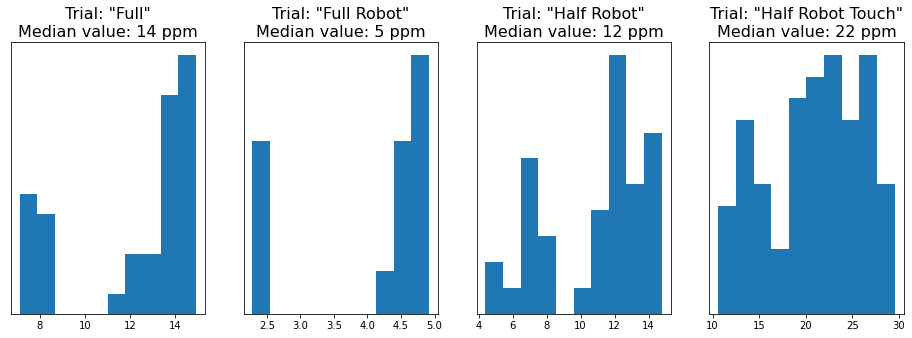

In [32]:
frequencies = segmentation.get_frequencies(subject)

fig, ax = plt.subplots(1,4,figsize=(16,5))
for i, k in enumerate(frequencies.keys()):
    ax[i].hist(frequencies[k])
    ax[i].set_title(
        f'Trial: \"{k.replace("_"," ").title()}\"\nMedian value: {np.median(frequencies[k]):.0f} ppm',
        fontsize=16
    )
    ax[i].set_yticks([])

# Time parameters

Frequencies and durations are selected as time-related global parameters

In [33]:
from brisk.analysis import parameters

tp = parameters.get_time_parameters(subject)
for k,v in tp.items():
    print(f'Trial {k.replace("_"," ").title()}, {v["all_frequency"].size} trials after outliers removal')
    print(f'\tAverage frequency: {v["avg_frequency"]:.0f} PPM')
    print(f'\tAverage duration: {v["avg_duration"]:.2f} s')
    print(f'\tVariability of duration: {v["std_duration"]:.2f} s')
    print()

Trial Full, 36 trials after outliers removal
	Average frequency: 14 PPM
	Average duration: 4.42 s
	Variability of duration: 0.89 s

Trial Full Robot, 13 trials after outliers removal
	Average frequency: 5 PPM
	Average duration: 13.14 s
	Variability of duration: 1.17 s

Trial Half Robot, 35 trials after outliers removal
	Average frequency: 12 PPM
	Average duration: 4.98 s
	Variability of duration: 2.97 s

Trial Half Robot Touch, 72 trials after outliers removal
	Average frequency: 22 PPM
	Average duration: 2.77 s
	Variability of duration: 0.86 s



# Extraction of the cycle based parameters

The cycle based parameters are:

- RMS value during the event (after removing mean value)
- Smoothness during the event (after removing mean value), described via the negative log-dimensionless jerk (i.e. more negative, less smooth)
- Value range during the event

All the parameters have been calculated on the 3 spatial component and on the global (total) value, of both accelerometer and gyroscope data

In [34]:
param = parameters.cycle_parameters(subject, update=update_subject)

Updating trial Full...
Updating trial Full Robot...
Updating trial Half Robot...
Updating trial Half Robot Touch...


# Extraction of the global parameters

In addition to the average value of the cycle parameters, regularity (i.e. value of the first peak of the autocorrelation) has been used as a parameter

In [35]:
pp = parameters.global_parameters(subject, update=update_subject)

Loading saved cycle parameters...
Updating trial Full...
Updating trial Full Robot...
Updating trial Half Robot...
Updating trial Half Robot Touch...


# Plots

## Accelerometer

### Trunk

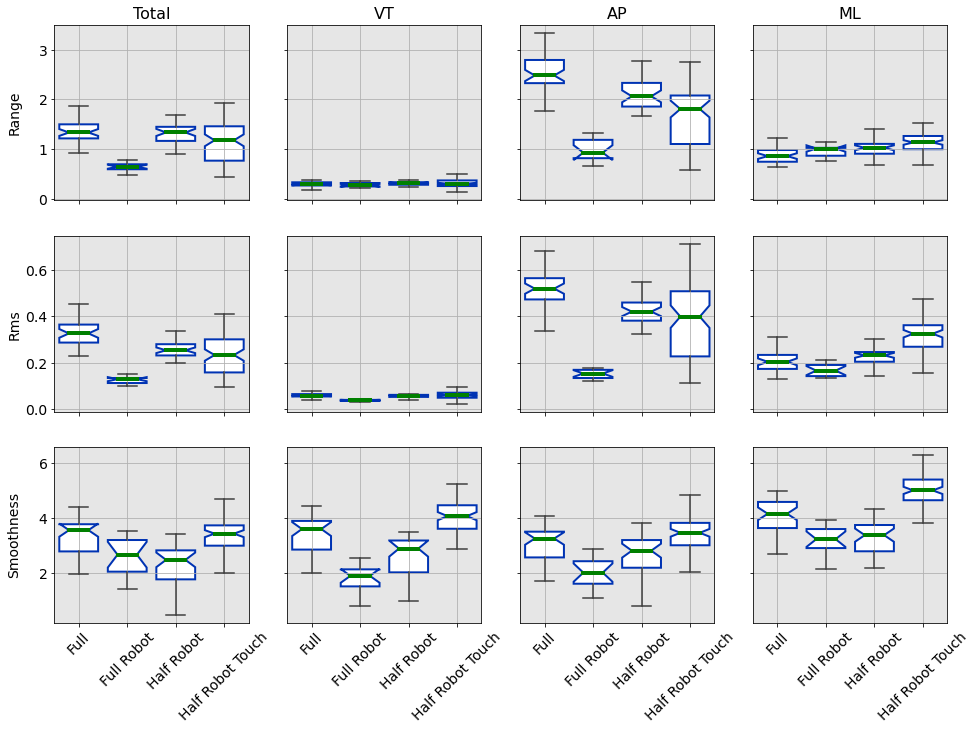

In [36]:
imu.plot_parameters(param, 'trunk', 'acc')

### Arm

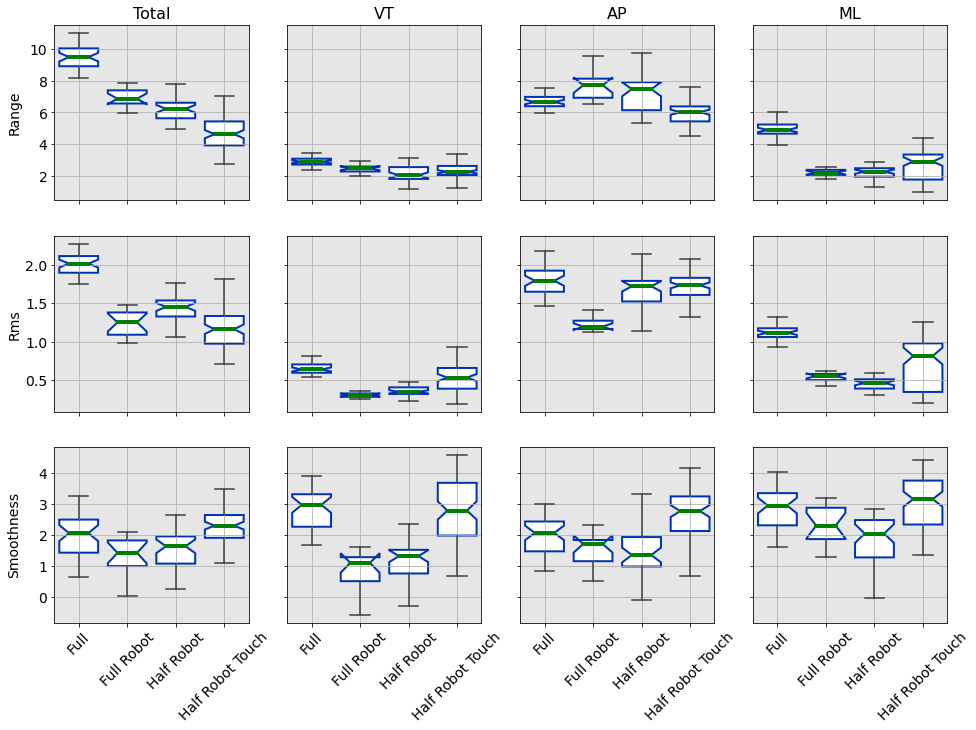

In [37]:
imu.plot_parameters(param, 'arm', 'acc')

### Forearm

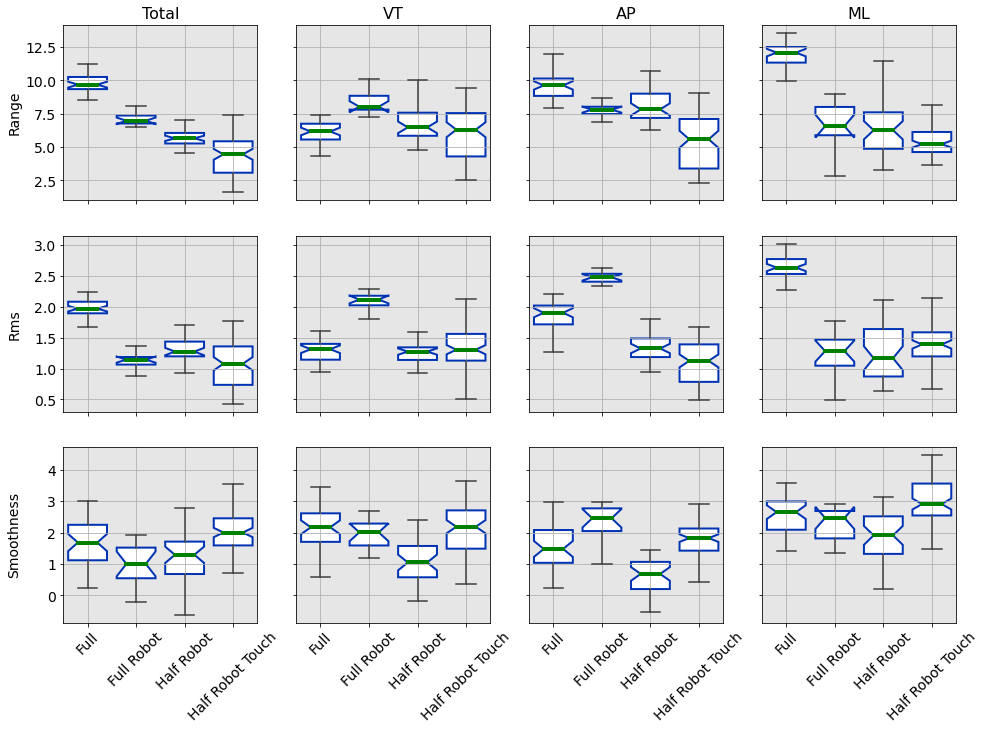

In [38]:
imu.plot_parameters(param, 'forearm', 'acc')

## Gyroscope

### Trunk

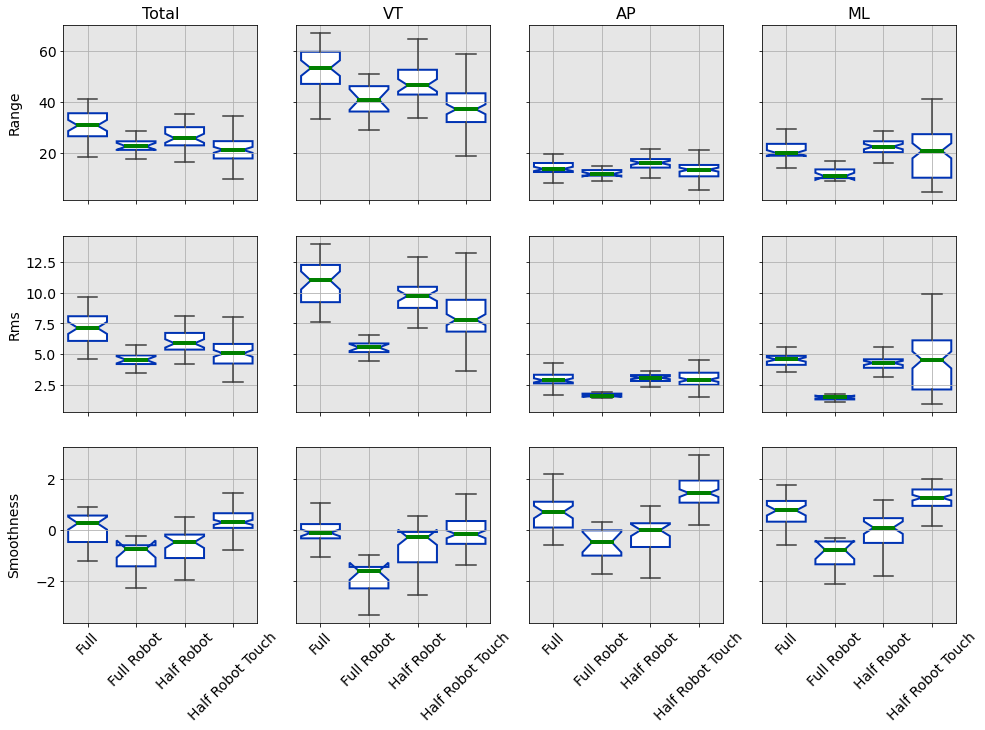

In [39]:
imu.plot_parameters(param, 'trunk', 'gyr')

### Arm

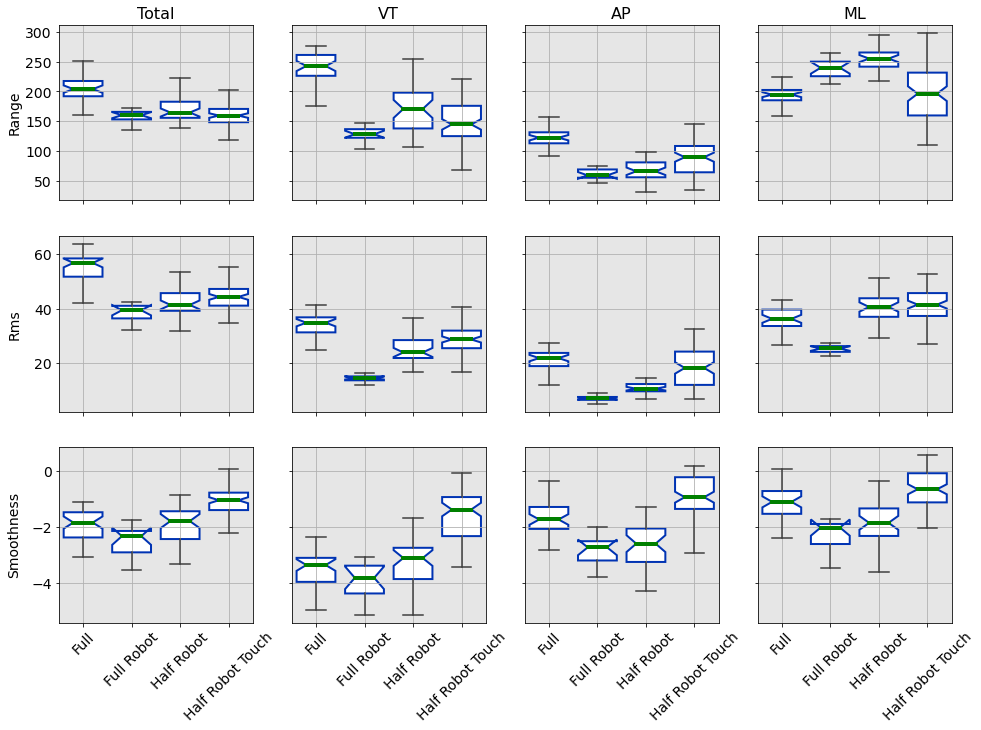

In [40]:
imu.plot_parameters(param, 'arm', 'gyr')

### Forearm

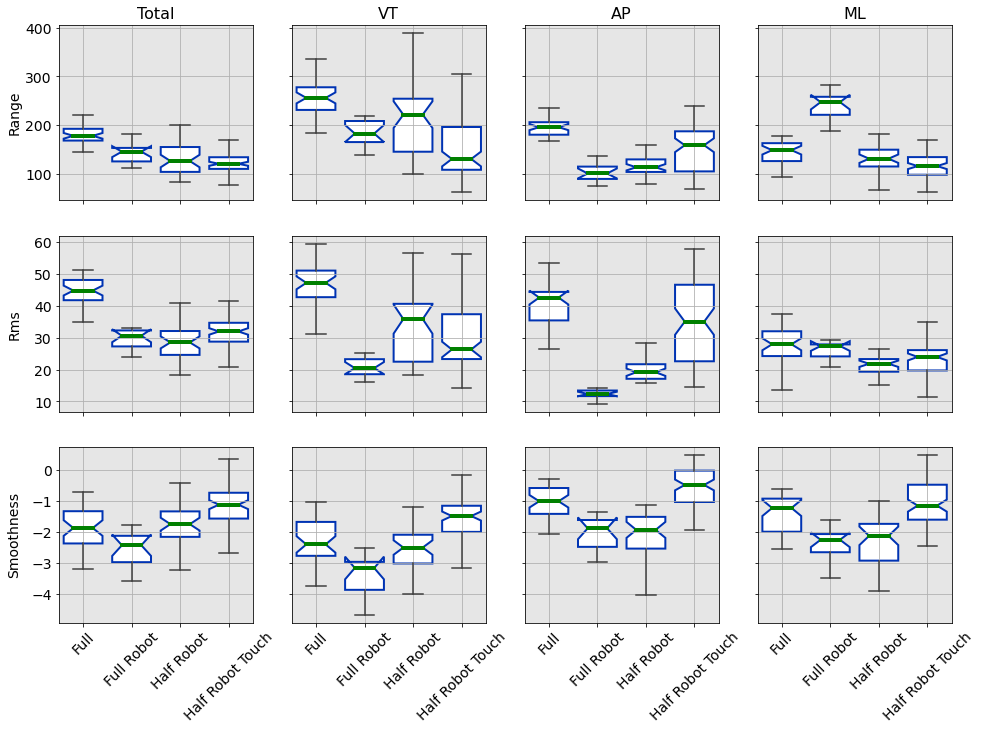

In [41]:
imu.plot_parameters(param, 'forearm', 'gyr')

# Global parameters

Here all the global parameters (number of events, median values for the cycle-based parameters and regularity) are shown.

In [42]:
pp.sort_values(axis=0,by=['segment','dimension']).set_index(['segment','dimension','trial']).head(pp.shape[0])

smoothness_acc  range_acc   rms_acc  \
segment dimension trial                                                   
arm     global    full                    1.964374   9.505922  2.001867   
                  full_robot              1.293282   6.976024  1.230161   
                  half_robot              1.513866   6.150087  1.424559   
                  half_robot_touch        2.247577   4.644728  1.178101   
        x         full                    2.806883   2.917566  0.652229   
                  full_robot              0.845782   2.468563  0.305660   
                  half_robot              1.083210   2.112898  0.359726   
                  half_robot_touch        2.726452   2.339817  0.531281   
        y         full                    1.944072   6.680058  1.791027   
                  full_robot              1.515541   7.653430  1.225098   
                  half_robot              1.428454   7.155865  1.663319   
                  half_robot_touch        2.658029   5.935132  1.687939   
        z         full                    2.843316   4.922180  1.114246   
                  full_robot              2.330050   2.204098  0.543039   
                  half_robot              1.785473   2.221630  0.456808   
                  half_robot_touch        3.028157   2.650063  0.684950   
forearm global    full                    1.657599   9.743151  1.975772   
                  full_robot              0.948879   7.099321  1.123571   
                  half_robot              1.250942   5.705282  1.298583   
                  half_robot_touch        2.037477   4.380430  1.071224   
        x         full                    2.188577   6.113250  1.302531   
                  full_robot              1.898219   8.365048  2.089968   
                  half_robot              1.083242   6.710802  1.253374   
                  half_robot_touch        2.112340   6.063314  1.327279   
        y         full                    1.581313   9.532859  1.867744   
                  full_robot              2.313218   7.757224  2.473832   
                  half_robot              0.603970   8.075293  1.319534   
                  half_robot_touch        1.760743   5.411303  1.094537   
        z         full                    2.539542  11.912105  2.647092   
                  full_robot              2.281063   6.525156  1.237505   
                  half_robot              1.928248   6.446883  1.272730   
                  half_robot_touch        2.995065   5.627961  1.473546   
trunk   global    full                    3.336351   1.374421  0.326402   
                  full_robot              2.588637   0.636916  0.125255   
                  half_robot              2.272496   1.312630  0.256721   
                  half_robot_touch        3.407481   1.126769  0.234095   
        x         full                    3.382771   0.294620  0.058681   
                  full_robot              1.800565   0.283043  0.036721   
                  half_robot              2.609873   0.311655  0.056494   
                  half_robot_touch        4.064072   0.313763  0.059964   
        y         full                    3.085571   2.543379  0.511377   
                  full_robot              2.026939   0.984489  0.149991   
                  half_robot              2.712670   2.126396  0.422916   
                  half_robot_touch        3.380376   1.647896  0.379154   
        z         full                    4.035052   0.872966  0.208490   
                  full_robot              3.184217   0.955808  0.168595   
                  half_robot              3.276532   1.004856  0.224121   
                  half_robot_touch        5.010849   1.117821  0.314906   

                                    smoothness_gyr   range_gyr    rms_gyr  \
segment dimension trial                                                     
arm     global    full                   -1.943976  201.634394  54.031997   
                  full_robot             -2.519827  15